# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Importing Pandas and numpy libraries to bring in and explore data
import pandas as pd
import numpy as np


In [2]:
# Importing Data from site
surgery = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
surgery.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
#Validating appropriate number of observations.  Data file explanation says 4 features which is confirmed in above 'head' and 306 instances
surgery.shape



(305, 4)

In [4]:
# It looks like there might be one missing instance based on shape of dataframe will do further analysis with describe. I have validated there are no null values
surgery.info()
surgery.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


,30,64,1,1.1
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [5]:
#Re-naming columns to explantory features
#surgery.rename(columns='30': 'age_at_surgery')
#surgery.rename(columns='64': 'year_of_surgery')
#surgery.rename(columns='1': 'number_positive_nodes')
#surgery.rename(columns='1.1': '5_year_survival')
#surgery.columns = ['age_at_surgery", 'year_of_surgery', 'number_positive_nodes', '5_year_survival']
# I had an error on lines 1-5 of code block saying that it was syntactically incorrect so I commented out for 1-on-1 later as question. Then tried another method.
# and had same syntactical error. Then tried to verify that columns were what I thought they were and tried a new method of mapping the colums old-> new
columnsNamesArr = surgery.columns.values
print (columnsNamesArr)
surgery_2 = surgery.rename(index=str, columns={"30": "age_at_surgery", "64": "year_of_surgery", "1": "number_of_positive_nodes", "1.1": "5_year_survival"})
surgery_2.head()

['30' '64' '1' '1.1']


,age_at_surgery,year_of_surgery,number_of_positive_nodes,5_year_survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# Changing 5_year_survival column to appropriate binary encoding
# Attempted mulitple ways 1- surgery_3=surgery_2['5_year_survival'] = surgery_2['5_year_survival'].replace('2', '0')
# Attempted multiple ways 2- surgery_2['5_year_survival'] = surgery_2['5_year_survival'].apply({'2':'0', '1':'1'}.get)
#Figured out I was trying to cast a string '' to an int and finally got it to work
surgery_2['5_year_survival'].replace([2], 0)
surgery_2['5_year_survival'] = surgery_2['5_year_survival'].replace([2], 0)
surgery_2.head(50)

,age_at_surgery,year_of_surgery,number_of_positive_nodes,5_year_survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,0
7,34,66,9,0
8,34,58,30,1
9,34,60,1,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [7]:
# Summary Statistics of whole data set shows a lot of information but need to delve deeper to find corolary data
surgery_2.describe()

,age_at_surgery,year_of_surgery,number_of_positive_nodes,5_year_survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [8]:
# Built pivot table classified by age and caluclated means of positive nodes vs 5 year survival to draw conculusions
surgery_2.pivot_table(index='age_at_surgery', values = ['number_of_positive_nodes', '5_year_survival'], aggfunc= 'mean')

,5_year_survival,number_of_positive_nodes
age_at_surgery,,
30,1.000000,1.500000
31,1.000000,3.000000
33,1.000000,5.000000
34,0.714286,8.142857
35,1.000000,6.500000
36,1.000000,0.500000
37,1.000000,3.500000
38,0.900000,4.400000
39,0.833333,1.000000


In [0]:
# Import Seaborn and matplotlib for graphical data visualization of dataset
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


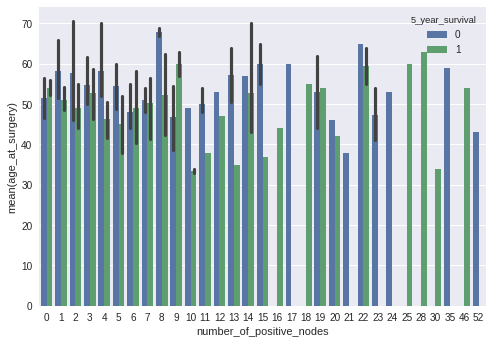

In [11]:
# Create Bar plot that compares number of positive nodes to age at surgery and the 5 year survival rate
sns.barplot(x='number_of_positive_nodes', y='age_at_surgery', hue='5_year_survival', data=surgery_2)

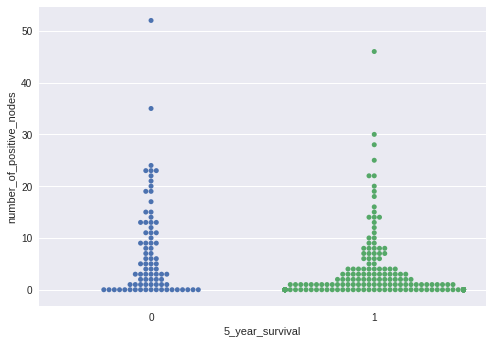

In [16]:
# Swarmplot comparison of 5 years survival vs numbers of positive nodes and Swarmplot comparison of 5 year survival with age (Below)
sns.swarmplot(x='5_year_survival', y='number_of_positive_nodes', data=surgery_2)
# Number of positive nodes seems to correlate with 5 year survival rate

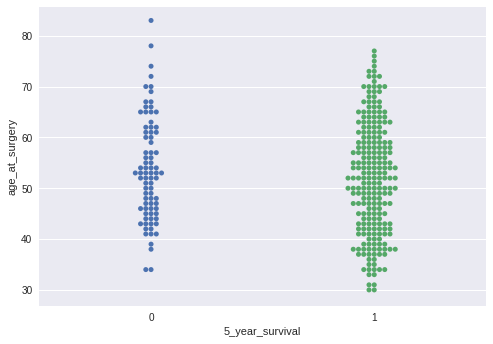

In [17]:
# Age at Surgery does not seem to correlate to survival rate
sns.swarmplot(x='5_year_survival', y='age_at_surgery', data=surgery_2)

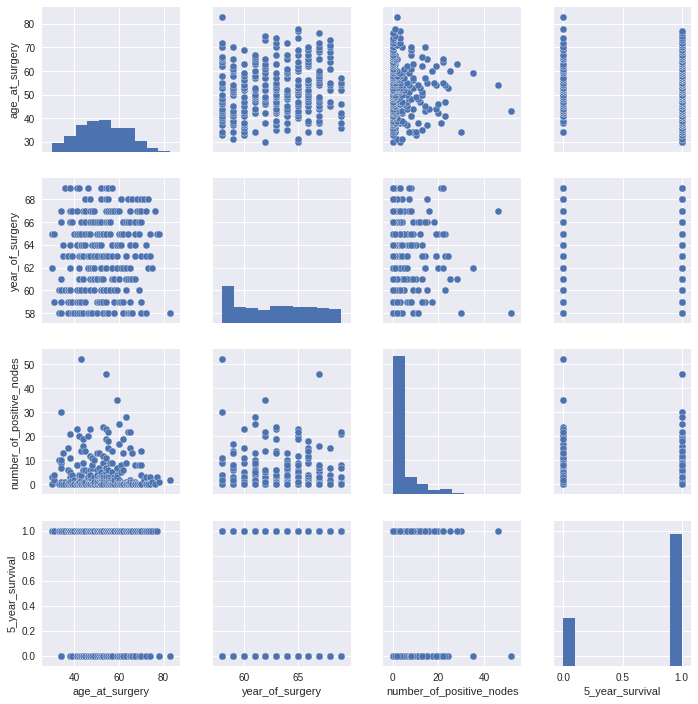

In [14]:
# using pairplot as a high level infernece to find corrolary datum
sns.pairplot(surgery_2)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1) One feature that seems to have a positive relationship with survival is number of nodes found, more specifically the lower the number of nodes found the greater the chance of a survival rate > 5 years.  The data shows in the plots above that there were more survivors > 5 years when there were lower number of nodes found. You can see clustering at the bottom of the swarm plot above as reference. 

2) Age at surgery seemed to have a negative impact on the relationship with survival > 5 years as illustrated in age x survival swarm plot. Between ages 30- 40 there are almost no survivors < 5 years where as age increases chance of survival > 5 years is decreased. 

3) One could infer that the older a patient is at time of surgery the longer they have had disease progression and the sub-optimal outcome is a greater numbner of nodes found.  While I understand that correlation does not imply causation.  One logical inference is that in fact a greater age could mean a greater disease stage.  This could be tested by graphing a swarm plot of age x nodes with survival rate as hue.  See below.

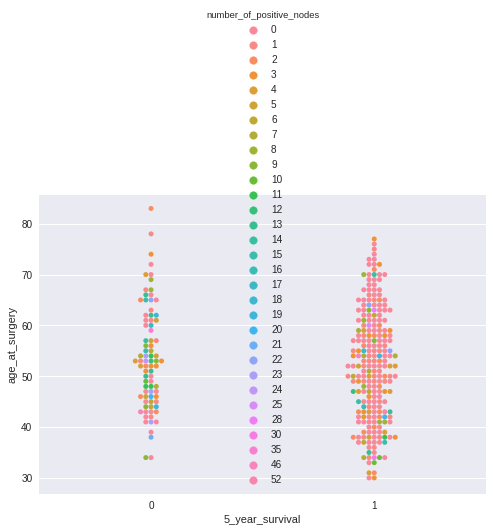

In [18]:
sns.swarmplot(x='5_year_survival', y= 'age_at_surgery', hue='number_of_positive_nodes', data=surgery_2)